In [26]:
import sys
sys.path.append("..")

import os
import json
import pandas as pd
import seaborn as sns
from tqdm import tqdm
from glob import glob
from utils.utils import readContentFromFile, getHashFromDict
from matplotlib import pyplot as plt

In [27]:
EXPERIMENTS_PATH = "./experiments/learningCurve"

In [28]:
experimentsResults = []
for path in tqdm(glob(f"{EXPERIMENTS_PATH}/*")):
    experimentId = os.path.basename(path)
    if len(experimentId) == 64:
        try: 
            with open(f"{EXPERIMENTS_PATH}/{experimentId}/setting.json") as f:
                experimentSetting = json.load(f)
            with open(f"{EXPERIMENTS_PATH}/{experimentId}/metrics.json") as f:
                experimentMetrics = {"metrics": list(json.load(f).values())[0]}
            experimentResult = {
                "id": experimentId,
                **experimentSetting,
                **experimentMetrics
            }
            experimentsResults.append(experimentResult)
        except Exception as e:
            print(f"Error while loading {experimentId} results.")
            print(e)

experimentsResultsDF = pd.DataFrame.from_dict(experimentsResults)
targetDatabaseDF = experimentsResultsDF["targetDatabase"].apply(pd.Series)
targetDatabaseDF.columns = ["targetDomain", "target_targetPredicate", "target_resetTargetPredicate"]
targetDatabaseDF["targetDomain"] = targetDatabaseDF.targetDomain.apply(lambda databasePath: os.path.basename(databasePath))
sourceDatabaseDF = experimentsResultsDF["sourceDatabase"].apply(pd.Series)
sourceDatabaseDF.columns = ["sourceDomain", "source_targetPredicate", "source_resetTargetPredicate"]
sourceDatabaseDF["sourceDomain"] = sourceDatabaseDF.sourceDomain.apply(lambda databasePath: os.path.basename(databasePath))
# metricsDF = experimentsResultsDF["metrics"].apply(pd.Series)
# metricsDF.columns = ["metrics"]

experimentsResultsDF = pd.concat([experimentsResultsDF, targetDatabaseDF, sourceDatabaseDF], axis = 1)
experimentsResultsDF = experimentsResultsDF.drop(["targetDatabase", "sourceDatabase", "ignoreSTDOUT"], axis = 1)

print("Total experiments:", experimentsResultsDF.shape[0])

100%|██████████| 21/21 [00:00<00:00, 184.32it/s]

Total experiments: 21


In [29]:
# Extracted from ./experimentDictGenerator.ipynb
modelMapping = {
    '396a63c068864d171cb3eeb5c9340cea81e4e0ce00592bd492485edfba59c5ff': "UTIL-BRDN (Best)",
    'bd52831309ada286d62e64cf24e949319f73c548fd60103f5c595d2a3b80e1c2': "UTIL-BRDN (Best)",
    'f3ae43b9215c2493380521cec736ff40fe7b9e98a9e093af156ec3ca880807cc': "UTIL-BRDN (Best)",
    '54ab7a686188f35592556347bf5251921a8ade4adb0ab22b7bcc078c9800b684': "UTIL-BRDN (Best)",
    '9d42911e8115f7e1f34b8333583d28b0bef5ccc46bcff5a7ba664af957adef29': "UTIL-BRDN (Best)",
    '6686ac04ddaf3e507af9c6b94b8f868e37c2d1a12fdccecaa8770b8892934d76': "UTIL-BRDN (Best)",
    'b45ead65a1670ade43e08d3f429838d56e21dd723ebd05a0db46df3323738b3e': "UTIL-BRDN (Best)",
    '51f933537100240bacb4f7a6341c4f77a9b233a4e493d5938c556dd990ddb4f1': "UTIL-BRDN (Worst)",
    '8f1f2f42ac13df76c11fdd4fc2012f1a02d64609e64fa0258d1e34c50a28301a': "UTIL-BRDN (Worst)",
    'ed84223eca8dea790d61b5ebed802d1bb652cf449866cd8d00740f4e6423c7fb': "UTIL-BRDN (Worst)",
    'a375d163f0e4c861940f9cbcceb0c5254eaa606a9d38144abce4a493d700af92': "UTIL-BRDN (Worst)",
    '81cb6ed097c877693916a86800636138255b05b772fdcd024958faa184cd04e5': "UTIL-BRDN (Worst)",
    '1083b5b58bc7c476d69917dc5a42cc31fdbc6910b4a51102867b0c71be10da74': "UTIL-BRDN (Worst)",
    '82685ff50ecd1e70faeec5f45a5feb4702b3d939876d71d7f9de55684df757ed': "UTIL-BRDN (Worst)",
    "0726cac0b41d9aa866dbf57bd36b115ed1c50e11afedc0232f4809c47533219a": "RDN-B",
    "51d101f2e9cfac1aa4edb1f463accf3f6b5d41f573f52ae1e90a28db8ad7b022": "RDN-B",
    "6a9f022b5fc34609ec98a9898cafb1845f9e40acb61a13255e18e0fdd935f419": "RDN-B",
    "816f88e322ad9332974b410b99743c591cfb28291770844b23d5ab2e50cf7967": "RDN-B",
    "b66e86ba8b85a4ad471123e9d4010515430a0c49c6fa23f7496e373ed78183cf": "RDN-B",
    "bf61e2b7f32e7599b7a4c2e147a01836132f2ca951dcf02c9642f97c877c9e1a": "RDN-B",
    "c0b61053859b77b0901fecdeaad7db8405a209cd76add3a212044068dae41802": "RDN-B"
}
experimentsResultsDF["label"] = experimentsResultsDF.id.apply(lambda id: modelMapping[id])
experimentsResultsDF.head()

,id,path,randomSeed,numberOfClauses,numberOfCycles,maxTreeDepth,nEstimators,nodeSize,negPosRatio,maxFailedNegSamplingRetries,...,utilityAlphaSetIter,weight,mapping,targetDomain,target_targetPredicate,target_resetTargetPredicate,sourceDomain,source_targetPredicate,source_resetTargetPredicate,label
0,0726cac0b41d9aa866dbf57bd36b115ed1c50e11afedc0...,./experiments/learningCurve,11,8,100,3,10,2,2,50,...,NaN,NaN,NaN,nell_sports,None,False,nell_finances,None,False,RDN-B
1,1083b5b58bc7c476d69917dc5a42cc31fdbc6910b4a511...,./experiments/learningCurve,11,8,100,3,10,2,2,50,...,1.0,"{'strategy': 'scalar', 'parameters': {'weight'...",{'relationMapping': {'accounttype': 'proteincl...,yeast,None,False,twitter,None,False,UTIL-BRDN (Worst)
2,396a63c068864d171cb3eeb5c9340cea81e4e0ce00592b...,./experiments/learningCurve,11,8,100,3,10,2,2,50,...,1.0,"{'strategy': 'scalar', 'parameters': {'weight'...","{'relationMapping': {'venue': 'workedunder', '...",imdb,None,False,cora,None,False,UTIL-BRDN (Best)
3,51d101f2e9cfac1aa4edb1f463accf3f6b5d41f573f52a...,./experiments/learningCurve,11,8,100,3,10,2,2,50,...,NaN,NaN,NaN,imdb,None,False,cora,None,False,RDN-B
4,51f933537100240bacb4f7a6341c4f77a9b233a4e493d5...,./experiments/learningCurve,11,8,100,3,10,2,2,50,...,5.0,"{'strategy': 'scalar', 'parameters': {'weight'...","{'relationMapping': {'title': 'workedunder', '...",imdb,None,False,cora,None,False,UTIL-BRDN (Worst)


In [30]:
experimentsResultsDF.groupby(["sourceDomain", "targetDomain"])[["id"]].count()

id
sourceDomain  targetDomain     
cora          imdb            3
imdb          cora            3
              uwcse           3
nell_finances nell_sports     3
nell_sports   nell_finances   3
twitter       yeast           3
yeast         twitter         3

In [31]:
experimentsResultsDF["mappingID"] = experimentsResultsDF.mapping.apply(lambda mapping: getHashFromDict(mapping))
experimentsResultsDF["weightID"] = experimentsResultsDF.weight.apply(lambda weight: getHashFromDict(weight))

experimentMappingsDF = experimentsResultsDF["mapping"].apply(pd.Series)
experimentMappingsDF = pd.concat([experimentsResultsDF[["mappingID"]], experimentMappingsDF], axis = 1)
experimentMappingsDF = experimentMappingsDF.drop_duplicates(subset = ["mappingID"])
experimentMappingsDF = experimentMappingsDF.reset_index(drop = True)
experimentMappingsDF["mappingShortID"] = [f"M{id+1:03d}" for id in experimentMappingsDF.index]
# NOTE: the mappingShortID may change when new experiments are carried out. Always be sure that the plots related to mappings are updated.

experimentWeightDF = experimentsResultsDF["weight"].apply(pd.Series)
experimentWeightDF = pd.concat([experimentsResultsDF[["weightID"]], experimentWeightDF], axis = 1)
experimentWeightDF = experimentWeightDF.drop_duplicates(subset = ["weightID"])
experimentWeightDF = experimentWeightDF.reset_index(drop = True)
experimentWeightDF["weightShortID"] = [f"W{id+1:03d}" for id in experimentWeightDF.index]
# NOTE: the mappingShortID may change when new experiments are carried out. Always be sure that the plots related to mappings are updated.

In [32]:
experimentMetricsDF = experimentsResultsDF[["id", "metrics"]].copy()
experimentMetricsDF.columns = ["experimentID", "metrics"]
experimentMetricsDF["metrics"] = experimentMetricsDF.metrics.apply(
    lambda metrics: metrics.items()
)
experimentMetricsDF = experimentMetricsDF.explode("metrics")
experimentMetricsDF["trainProportion"] = experimentMetricsDF.metrics.apply(lambda metrics: float(metrics[0].replace("trainProportion-", "")))
experimentMetricsDF["foldsMetrics"] = experimentMetricsDF.metrics.apply(lambda metrics: metrics[1].items())
experimentMetricsDF = experimentMetricsDF.explode("foldsMetrics")
experimentMetricsDF["testFold"] = experimentMetricsDF.foldsMetrics.apply(lambda metrics: metrics[0])
experimentMetricsDF["metrics"] = experimentMetricsDF.foldsMetrics.apply(lambda metrics: metrics[1])
experimentMetricsDF = pd.concat(
    [experimentMetricsDF, experimentMetricsDF.metrics.apply(pd.Series).astype(float)], 
    axis = 1
)
experimentMetricsDF = experimentMetricsDF.drop(["metrics", "foldsMetrics"], axis = 1)
experimentMetricsDF = experimentMetricsDF.sort_values(["experimentID", "trainProportion", "testFold"])
experimentMetricsDF = experimentMetricsDF.reset_index(drop = True)

columnsToKeep = [
    'id', 'sourceDomain', 'targetDomain', 'target_targetPredicate', 'sourceUtilityAlpha', 'targetUtilityAlpha',  
    'utilityAlphaSetIter', 'mappingID', 'weightID', 'useRecursion', 'path', 'negPosRatio', 'randomSeed', 
    'maxFailedNegSamplingRetries', 'numberOfClauses', 'numberOfCycles', 'maxTreeDepth', 'nEstimators', 'nodeSize',
    "label"
]
experimentsResultsDF = experimentsResultsDF[columnsToKeep].copy(deep = True)

experimentsResultsDF = pd.merge(
    experimentsResultsDF, 
    experimentMappingsDF[["mappingID", "mappingShortID"]], 
    on = "mappingID", 
    how = "left"
)

experimentsResultsDF = pd.merge(
    experimentsResultsDF, 
    experimentWeightDF[["weightID", "weightShortID"]], 
    on = "weightID", 
    how = "left"
)

experimentsResultsDF["aucROC_mean"] = experimentsResultsDF["id"].apply(
    lambda expID: experimentMetricsDF[experimentMetricsDF["experimentID"] == expID].aucROC.mean()
)
experimentsResultsDF["aucROC_std"] = experimentsResultsDF["id"].apply(
    lambda expID: experimentMetricsDF[experimentMetricsDF["experimentID"] == expID].aucROC.std()
)
experimentsResultsDF["aucPR_mean"] = experimentsResultsDF["id"].apply(
    lambda expID: experimentMetricsDF[experimentMetricsDF["experimentID"] == expID].aucPR.mean()
)
experimentsResultsDF["aucPR_std"] = experimentsResultsDF["id"].apply(
    lambda expID: experimentMetricsDF[experimentMetricsDF["experimentID"] == expID].aucPR.std()
)

In [33]:
experimentsResultsDF

,id,sourceDomain,targetDomain,target_targetPredicate,sourceUtilityAlpha,targetUtilityAlpha,utilityAlphaSetIter,mappingID,weightID,useRecursion,...,maxTreeDepth,nEstimators,nodeSize,label,mappingShortID,weightShortID,aucROC_mean,aucROC_std,aucPR_mean,aucPR_std
0,0726cac0b41d9aa866dbf57bd36b115ed1c50e11afedc0...,nell_finances,nell_sports,None,NaN,NaN,NaN,d5b592c05dc25b5032553f1b27f4139be95e881f73db33...,d5b592c05dc25b5032553f1b27f4139be95e881f73db33...,True,...,3,10,2,RDN-B,M001,W001,0.990610,0.004689,0.981662,0.009213
1,1083b5b58bc7c476d69917dc5a42cc31fdbc6910b4a511...,twitter,yeast,None,0.3,0.0,1.0,dd9bc4af03a04eb75642579c83a8f2d7f491272b9e777a...,d42b44f4c3a4e5502499c32e1bc8e995921ae19dad0d01...,True,...,3,10,2,UTIL-BRDN (Worst),M002,W002,0.711641,0.181343,0.638540,0.184333
2,396a63c068864d171cb3eeb5c9340cea81e4e0ce00592b...,cora,imdb,None,0.0,1.0,1.0,822b016b51618e5b755c1499590363ce2ab695c2c03e4e...,d42b44f4c3a4e5502499c32e1bc8e995921ae19dad0d01...,False,...,3,10,2,UTIL-BRDN (Best),M003,W002,0.980000,0.100000,0.973333,0.133333
3,51d101f2e9cfac1aa4edb1f463accf3f6b5d41f573f52a...,cora,imdb,None,NaN,NaN,NaN,d5b592c05dc25b5032553f1b27f4139be95e881f73db33...,d5b592c05dc25b5032553f1b27f4139be95e881f73db33...,False,...,3,10,2,RDN-B,M001,W001,1.000000,0.000000,1.000000,0.000000
4,51f933537100240bacb4f7a6341c4f77a9b233a4e493d5...,cora,imdb,None,0.6,0.0,5.0,c1ce2a4f2a302751ccb850ce22bfdc1d212416cfd1ccc0...,d42b44f4c3a4e5502499c32e1bc8e995921ae19dad0d01...,False,...,3,10,2,UTIL-BRDN (Worst),M004,W002,0.974775,0.102297,0.959606,0.147397
5,54ab7a686188f35592556347bf5251921a8ade4adb0ab2...,nell_finances,nell_sports,None,1.3,0.0,5.0,b1d49ff0f597fbcb8f3bfdf071055148c7c4c9516c5775...,d42b44f4c3a4e5502499c32e1bc8e995921ae19dad0d01...,True,...,3,10,2,UTIL-BRDN (Best),M005,W002,0.994816,0.003766,0.989756,0.009171
6,6686ac04ddaf3e507af9c6b94b8f868e37c2d1a12fdcce...,twitter,yeast,None,0.0,0.6,1.0,6923b4d49d57ac072d883a67e56a9c2052d7a4cee3707e...,d42b44f4c3a4e5502499c32e1bc8e995921ae19dad0d01...,True,...,3,10,2,UTIL-BRDN (Best),M006,W002,0.995260,0.003095,0.988382,0.007934
7,6a9f022b5fc34609ec98a9898cafb1845f9e40acb61a13...,twitter,yeast,None,NaN,NaN,NaN,d5b592c05dc25b5032553f1b27f4139be95e881f73db33...,d5b592c05dc25b5032553f1b27f4139be95e881f73db33...,True,...,3,10,2,RDN-B,M001,W001,0.899538,0.094593,0.851131,0.120284
8,816f88e322ad9332974b410b99743c591cfb2829177084...,imdb,cora,None,NaN,NaN,NaN,d5b592c05dc25b5032553f1b27f4139be95e881f73db33...,d5b592c05dc25b5032553f1b27f4139be95e881f73db33...,False,...,3,10,2,RDN-B,M001,W001,0.802174,0.157937,0.657676,0.188503
9,81cb6ed097c877693916a86800636138255b05b772fdcd...,nell_sports,nell_finances,None,0.0,0.0,3.0,2cb088b3c79f5d7a78516f7702ff9172ff8f17f4824e06...,d42b44f4c3a4e5502499c32e1bc8e995921ae19dad0d01...,True,...,3,10,2,UTIL-BRDN (Worst),M007,W002,0.603413,0.078233,0.485030,0.100411


In [34]:
experimentsResultsDF[    
    (experimentsResultsDF.sourceDomain == "cora") & 
    (experimentsResultsDF.targetDomain == "imdb")
]

,id,sourceDomain,targetDomain,target_targetPredicate,sourceUtilityAlpha,targetUtilityAlpha,utilityAlphaSetIter,mappingID,weightID,useRecursion,...,maxTreeDepth,nEstimators,nodeSize,label,mappingShortID,weightShortID,aucROC_mean,aucROC_std,aucPR_mean,aucPR_std
2,396a63c068864d171cb3eeb5c9340cea81e4e0ce00592b...,cora,imdb,None,0.0,1.0,1.0,822b016b51618e5b755c1499590363ce2ab695c2c03e4e...,d42b44f4c3a4e5502499c32e1bc8e995921ae19dad0d01...,False,...,3,10,2,UTIL-BRDN (Best),M003,W002,0.980000,0.100000,0.973333,0.133333
3,51d101f2e9cfac1aa4edb1f463accf3f6b5d41f573f52a...,cora,imdb,None,NaN,NaN,NaN,d5b592c05dc25b5032553f1b27f4139be95e881f73db33...,d5b592c05dc25b5032553f1b27f4139be95e881f73db33...,False,...,3,10,2,RDN-B,M001,W001,1.000000,0.000000,1.000000,0.000000
4,51f933537100240bacb4f7a6341c4f77a9b233a4e493d5...,cora,imdb,None,0.6,0.0,5.0,c1ce2a4f2a302751ccb850ce22bfdc1d212416cfd1ccc0...,d42b44f4c3a4e5502499c32e1bc8e995921ae19dad0d01...,False,...,3,10,2,UTIL-BRDN (Worst),M004,W002,0.974775,0.102297,0.959606,0.147397


In [35]:
experimentsResultsDF = experimentsResultsDF.sort_values(["sourceDomain", "targetDomain"])

In [36]:
def plotLearningCurve(sourceDomain, targetDomain, metric):
    fig = plt.figure(figsize = (8,6), dpi = 150)
    sns.lineplot(
        data = pd.merge(
            experimentsResultsDF[
                (experimentsResultsDF.sourceDomain == sourceDomain) & 
                (experimentsResultsDF.targetDomain == targetDomain)
            ][["id", "label"]],
            experimentMetricsDF,
            left_on = "id",
            right_on = "experimentID",
            how = "left"
        ),
        x = "trainProportion",
        y = metric,
        style = "label",
        markers = True,
        style_order = ["RDN-B", "UTIL-BRDN (Best)", "UTIL-BRDN (Worst)"],
        errorbar = None,
        hue = "label",
        hue_order = ["RDN-B", "UTIL-BRDN (Best)", "UTIL-BRDN (Worst)"],
    )
    plt.ylim(0,1)
    plt.xlim(0.15,1.05)
    plt.xticks([0.2,0.4,0.6,0.8,1.0])
    plt.legend(title = "model", loc = "lower left")

# **IMDB to Cora**

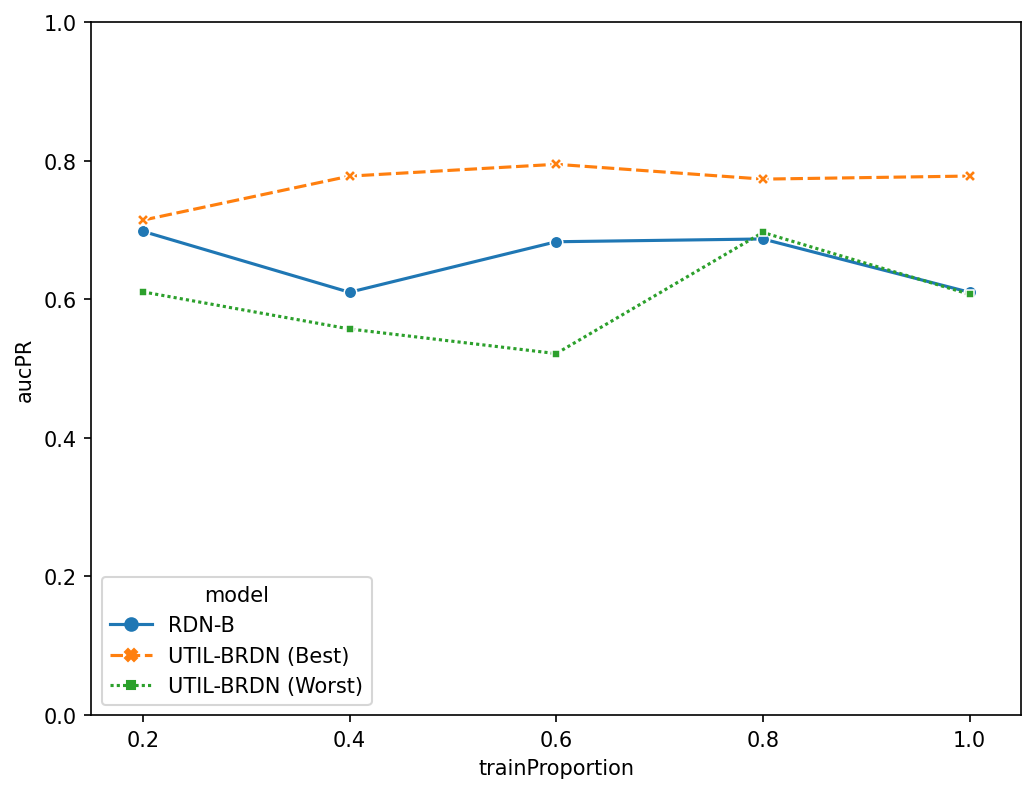

In [37]:
sourceDomain = "imdb"
targetDomain = "cora"
metric = "aucPR"
plotLearningCurve(sourceDomain, targetDomain, metric)

# **Cora to IMDB**

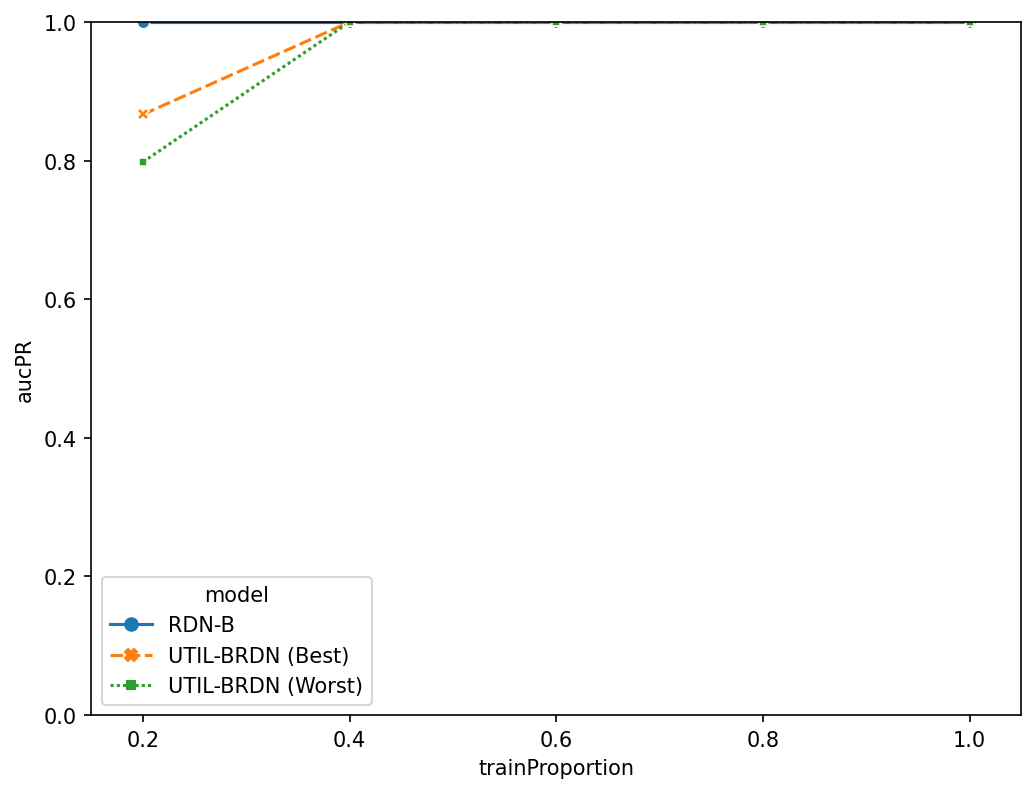

In [38]:
sourceDomain = "cora"
targetDomain = "imdb"
metric = "aucPR"
plotLearningCurve(sourceDomain, targetDomain, metric)

# **IMDB to UW-CSE**

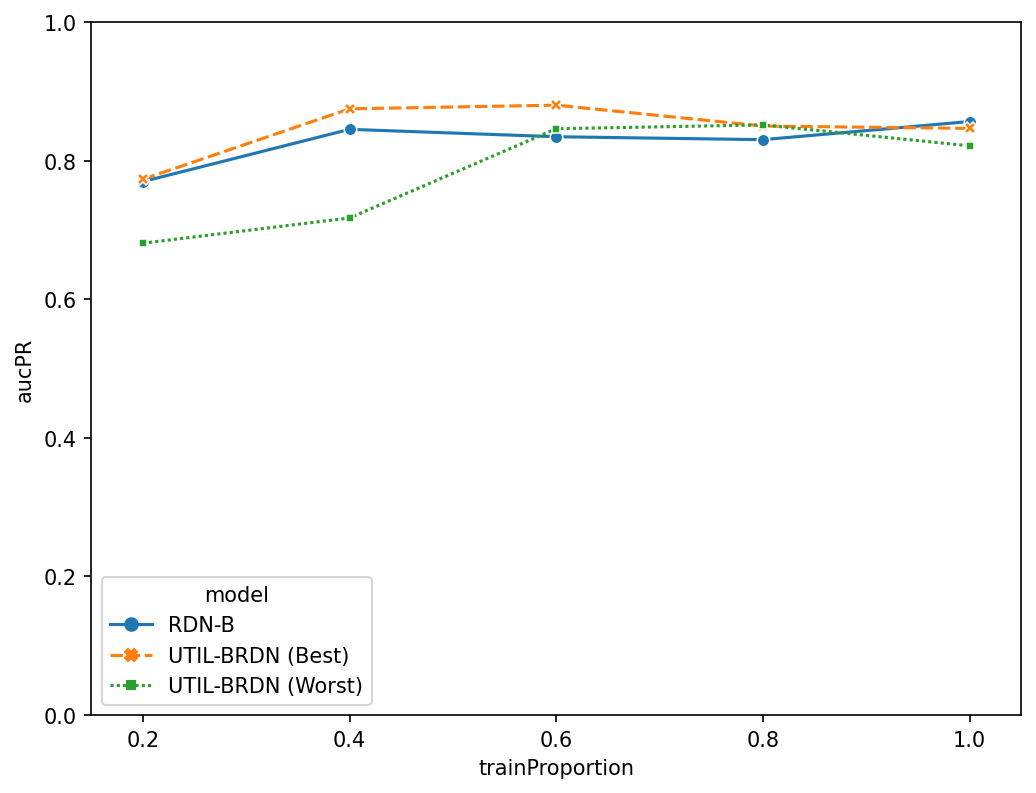

In [32]:
sourceDomain = "imdb"
targetDomain = "uwcse"
metric = "aucPR"
plotLearningCurve(sourceDomain, targetDomain, metric)

# **Twitter to Yeast**

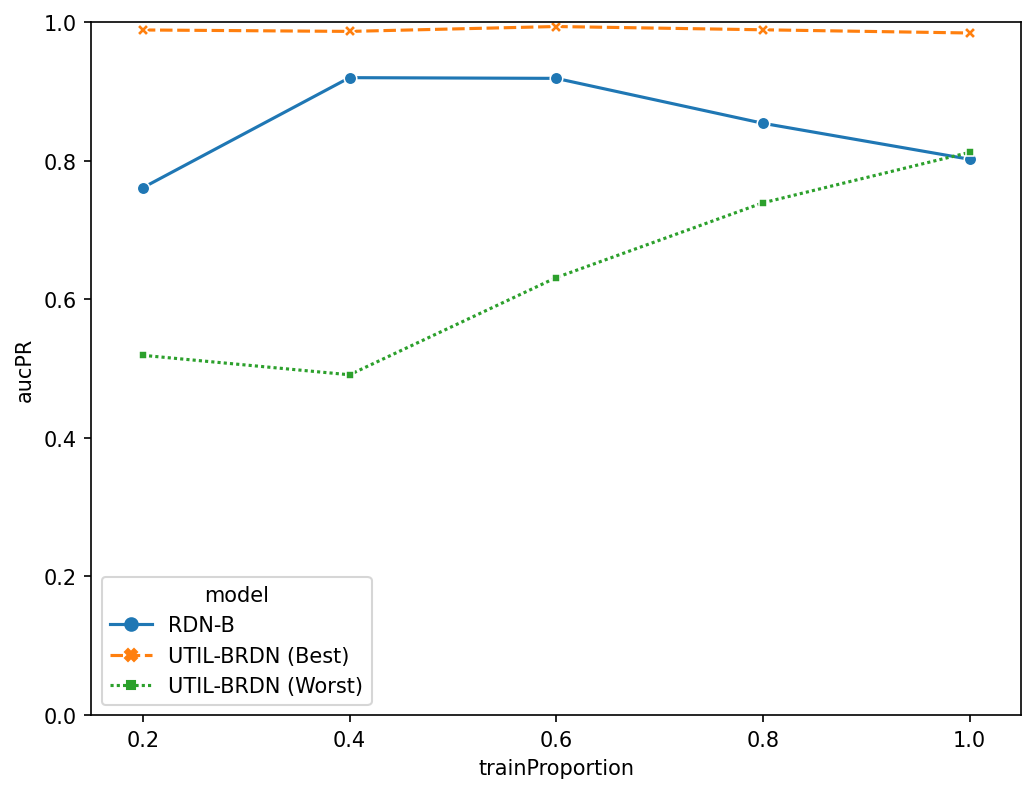

In [33]:
sourceDomain = "twitter"
targetDomain = "yeast"
metric = "aucPR"
plotLearningCurve(sourceDomain, targetDomain, metric)

# **Yeast to Twitter**

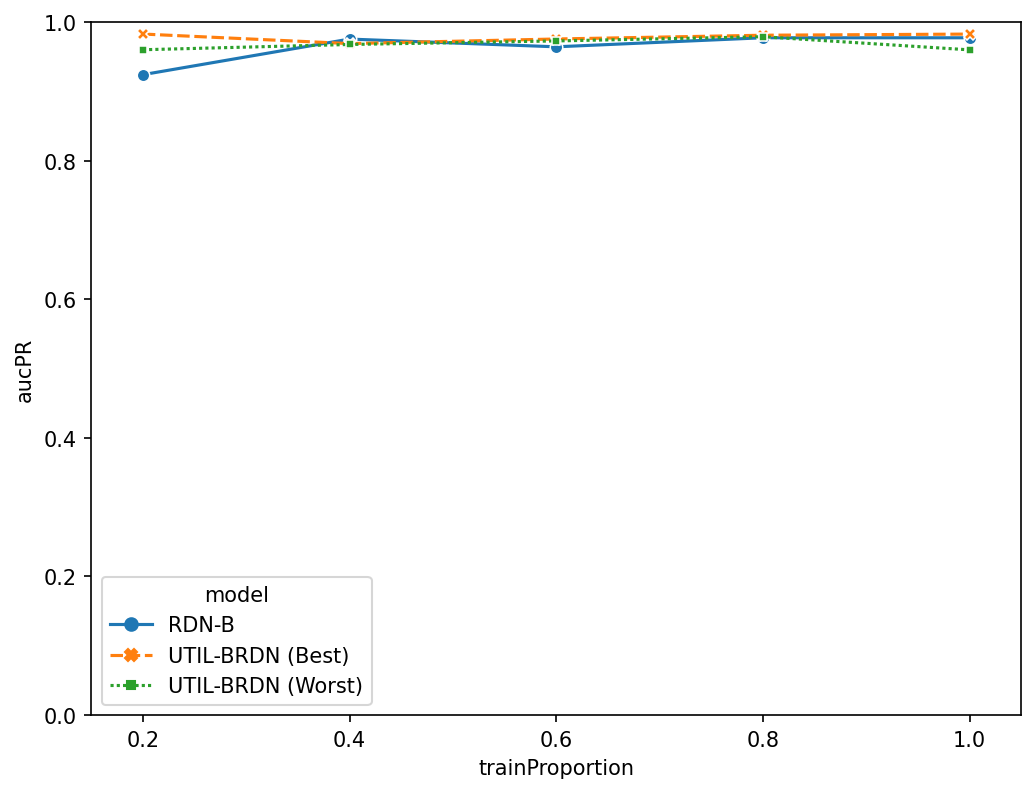

In [34]:
sourceDomain = "yeast"
targetDomain = "twitter"
metric = "aucPR"
plotLearningCurve(sourceDomain, targetDomain, metric)

# **NELL Finances to NELL Sports**

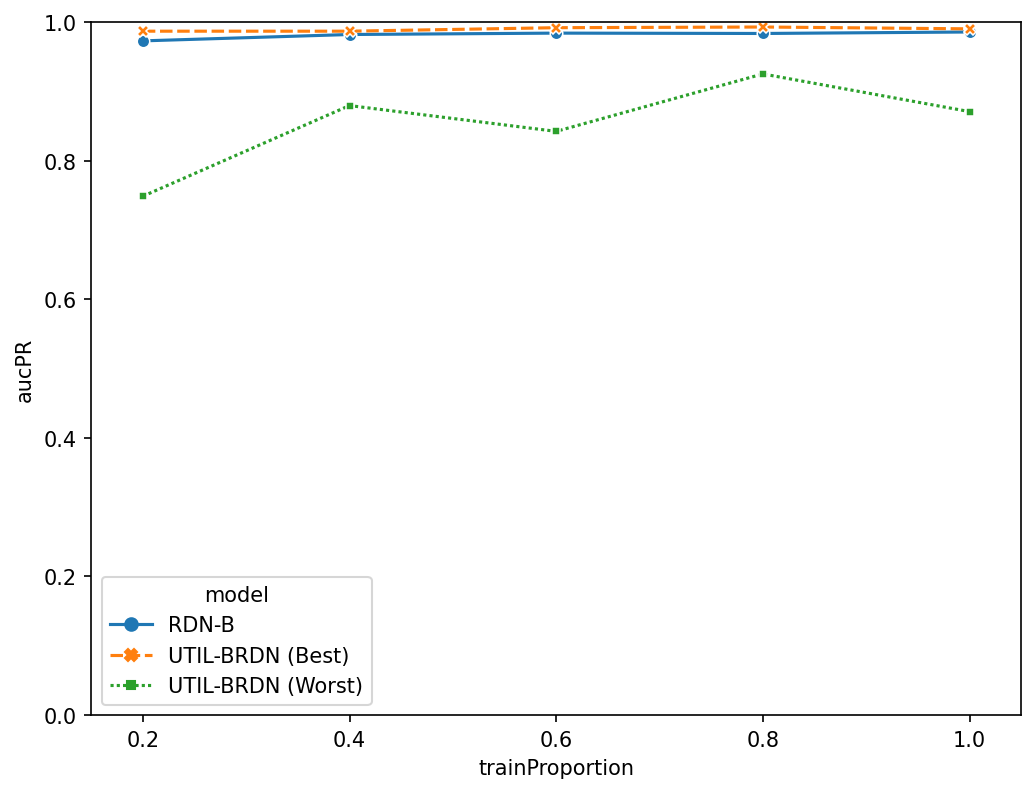

In [35]:
sourceDomain = "nell_finances"
targetDomain = "nell_sports"
metric = "aucPR"
plotLearningCurve(sourceDomain, targetDomain, metric)

# **NELL Sports to NELL Finances**

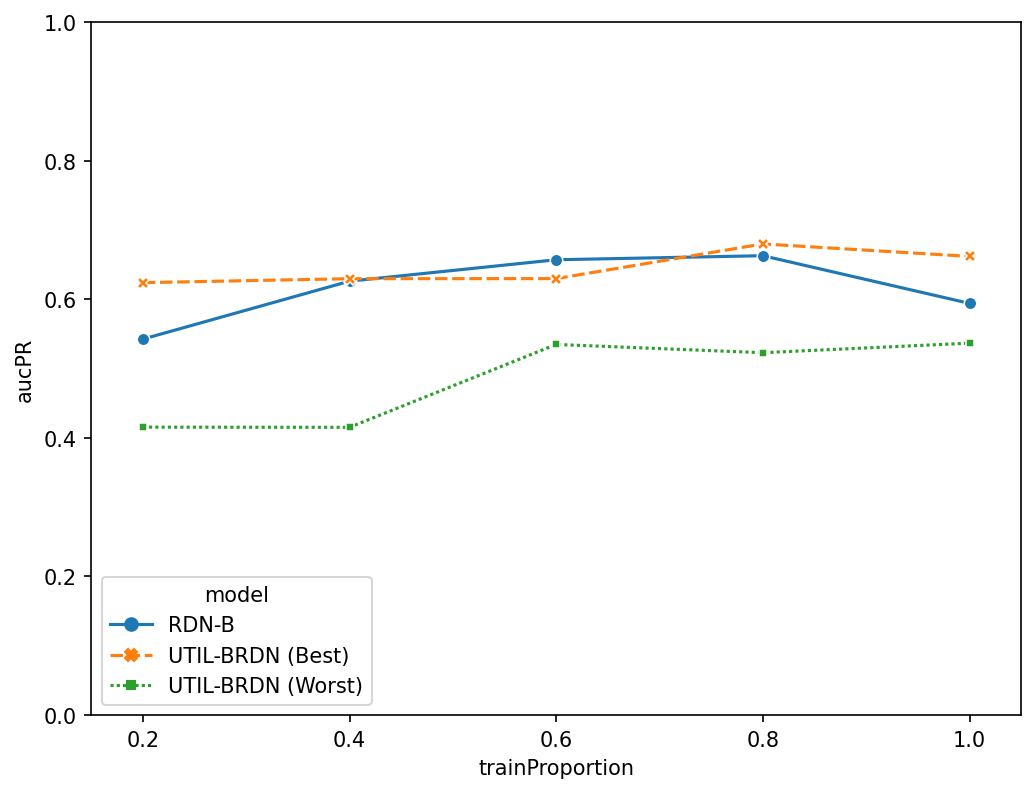

In [36]:
sourceDomain = "nell_sports"
targetDomain = "nell_finances"
metric = "aucPR"
plotLearningCurve(sourceDomain, targetDomain, metric)